# Balance Sheet and Income Statement Projections

#### A basic program that gathers data from Alphabet Inc. (GOOG) 10-K forms and uses it to perform a number of financial projections. Uses calculations on both the balance sheet and income statement. Data is gathered within the span of 2015-2021 and projected five years into the future. With some tweaking and cleaning, can also gather data from 10-Q forms and other more specific financial statements within the SEC EDGAR database. 

In [816]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [817]:
import requests
import re

In [818]:
headers = {'User-Agent': 'jacksonlanda@uchicago.edu'}
response = requests.get("https://www.sec.gov/files/company_tickers.json", headers=headers)

In [819]:
cik = response.json()
#print(cik)
#print(response.json())

# Requesting Company Filings through  SEC API

In [820]:
#Get Alphabet Inc. SEC Filings and format them with json
response = requests.get("https://data.sec.gov/api/xbrl/companyfacts/CIK0001652044.json", headers=headers)
facts = response.json()

cf = facts['facts']['us-gaap'] #Dictionary path to facts
print(cf['Revenues'])
metric_keys = cf.keys()
print(metric_keys)

{'label': 'Revenues', 'description': 'Amount of revenue recognized from goods sold, services rendered, insurance premiums, or other activities that constitute an earning process. Includes, but is not limited to, investment and interest income before deduction of interest expense when recognized as a component of revenue, and sales and trading gain (loss).', 'units': {'USD': [{'start': '2013-01-01', 'end': '2013-12-31', 'val': 55519000000, 'accn': '0001652044-16-000012', 'fy': 2015, 'fp': 'FY', 'form': '10-K', 'filed': '2016-02-11'}, {'start': '2013-01-01', 'end': '2013-12-31', 'val': 55519000000, 'accn': '0001652044-16-000022', 'fy': 2015, 'fp': 'FY', 'form': '8-K', 'filed': '2016-05-03', 'frame': 'CY2013'}, {'start': '2014-01-01', 'end': '2014-09-30', 'val': 47898000000, 'accn': '0001652044-15-000005', 'fy': 2015, 'fp': 'Q3', 'form': '10-Q', 'filed': '2015-10-29'}, {'start': '2014-07-01', 'end': '2014-09-30', 'val': 16523000000, 'accn': '0001652044-15-000005', 'fy': 2015, 'fp': 'Q3', 

# Gathering Metric Data From 10-K Files For Income Statement

In [821]:
metrics = ['Assets', 'Liabilities', 'LiabilitiesAndStockholdersEquity', 'Revenues', 'CostOfRevenue', 
           'GeneralAndAdministrativeExpense','MarketingAndAdvertisingExpense', 
           'ResearchAndDevelopmentExpense', 'AllocatedShareBasedCompensationExpense', 'InterestIncomeOther', 
           'InterestExpense','EffectiveIncomeTaxRateContinuingOperations'] #Necessary Metrics

dffinal = pd.DataFrame() #Establish Dataframe to loop over and aggregate data in

#Loop through list of valuable metrics and gather data for analysis
for m in metrics:
    unit = list(cf[m]['units'].keys())[0] #Select path to data
    a = cf[m]['units'][unit]
    df = pd.DataFrame(a) #Pull data into pandas dataframe
    
    dfnew = df.rename(columns={'val': m}) #Name column after metric
    dfnew = dfnew.loc[:, ['end', 'form', m]] #Select relavent info
    dfnew = dfnew[dfnew['form'] == '10-K'] #Select only 10-K reports
    
    if not dffinal.empty: #Merge on date and form
        dffinal = dffinal.merge(dfnew, left_on=['end', 'form'], right_on=['end', 'form'], how='inner') 
    elif dffinal.empty: #Establish new dataframe
        dffinal = dfnew
        
#General data cleaning and specific fixes
metrics_df = dffinal.drop_duplicates(ignore_index=True)
metrics_df = metrics_df.drop_duplicates(subset='end', ignore_index=True)
metrics_df['TaxExpense'] = ['NaN', 4672000000, 14531000000, 4177000000, 5282000000, 7813000000, 5282000000]
metrics_df['TaxExpense'] = pd.to_numeric(metrics_df['TaxExpense'], errors='coerce')
metrics_df

,end,form,Assets,Liabilities,LiabilitiesAndStockholdersEquity,Revenues,CostOfRevenue,GeneralAndAdministrativeExpense,MarketingAndAdvertisingExpense,ResearchAndDevelopmentExpense,AllocatedShareBasedCompensationExpense,InterestIncomeOther,InterestExpense,EffectiveIncomeTaxRateContinuingOperations,TaxExpense
0,2015-12-31,10-K,147461000000,27130000000,147461000000,74989000000,28164000000,6136000000,3186000000,12282000000,5253000000,999000000,104000000,0.168,NaN
1,2016-12-31,10-K,167497000000,28461000000,167497000000,90272000000,35138000000,6985000000,3868000000,13948000000,6871000000,1220000000,124000000,0.193,4.672000e+09
2,2017-12-31,10-K,197295000000,44793000000,197295000000,110855000000,45583000000,6872000000,5100000000,16625000000,7900000000,1312000000,109000000,0.534,1.453100e+10
3,2018-12-31,10-K,232792000000,55164000000,232792000000,136819000000,59549000000,8126000000,6400000000,21419000000,10000000000,1878000000,114000000,0.120,4.177000e+09
4,2019-12-31,10-K,275909000000,74467000000,275909000000,161857000000,71896000000,9551000000,6800000000,26018000000,11700000000,2427000000,100000000,0.133,5.282000e+09
5,2020-12-31,10-K,319616000000,97072000000,319616000000,182527000000,84732000000,11052000000,5400000000,27573000000,13400000000,1865000000,135000000,0.162,7.813000e+09
6,2021-12-31,10-K,359268000000,107633000000,359268000000,257637000000,110939000000,13510000000,7900000000,31562000000,15700000000,1499000000,346000000,0.162,5.282000e+09


# Begin Income/Balance Sheet Model

In [823]:
#Gross Profit
metrics_df['GrossProfit'] = (metrics_df['Revenues'] - metrics_df['CostOfRevenue'])
metrics_df['GrossProfitMargin'] = (1 - (metrics_df['CostOfRevenue']/metrics_df['Revenues']))

#Operating Expenses And Operating Profit
metrics_df['OperatingExpenses'] = (metrics_df[['GeneralAndAdministrativeExpense','MarketingAndAdvertisingExpense', 
                                                   'ResearchAndDevelopmentExpense']].sum(axis=1))
metrics_df['OperatingProfit'] = (metrics_df['GrossProfit'] - metrics_df['OperatingExpenses'])


#Pretax Profit
metrics_df['PretaxProfit'] = (metrics_df['InterestIncomeOther'] + metrics_df['OperatingProfit']
                              - metrics_df['InterestExpense'])

#NetIncome
metrics_df['NetIncome'] = (metrics_df['PretaxProfit'] - metrics_df['TaxExpense'])
    
metrics_df

,end,form,Assets,Liabilities,LiabilitiesAndStockholdersEquity,Revenues,CostOfRevenue,GeneralAndAdministrativeExpense,MarketingAndAdvertisingExpense,ResearchAndDevelopmentExpense,...,InterestIncomeOther,InterestExpense,EffectiveIncomeTaxRateContinuingOperations,TaxExpense,GrossProfit,GrossProfitMargin,OperatingExpenses,OperatingProfit,PretaxProfit,NetIncome
0,2015-12-31,10-K,147461000000,27130000000,147461000000,74989000000,28164000000,6136000000,3186000000,12282000000,...,999000000,104000000,0.168,NaN,46825000000,0.624425,21604000000,25221000000,26116000000,NaN
1,2016-12-31,10-K,167497000000,28461000000,167497000000,90272000000,35138000000,6985000000,3868000000,13948000000,...,1220000000,124000000,0.193,4.672000e+09,55134000000,0.610754,24801000000,30333000000,31429000000,2.675700e+10
2,2017-12-31,10-K,197295000000,44793000000,197295000000,110855000000,45583000000,6872000000,5100000000,16625000000,...,1312000000,109000000,0.534,1.453100e+10,65272000000,0.588805,28597000000,36675000000,37878000000,2.334700e+10
3,2018-12-31,10-K,232792000000,55164000000,232792000000,136819000000,59549000000,8126000000,6400000000,21419000000,...,1878000000,114000000,0.120,4.177000e+09,77270000000,0.564761,35945000000,41325000000,43089000000,3.891200e+10
4,2019-12-31,10-K,275909000000,74467000000,275909000000,161857000000,71896000000,9551000000,6800000000,26018000000,...,2427000000,100000000,0.133,5.282000e+09,89961000000,0.555805,42369000000,47592000000,49919000000,4.463700e+10
5,2020-12-31,10-K,319616000000,97072000000,319616000000,182527000000,84732000000,11052000000,5400000000,27573000000,...,1865000000,135000000,0.162,7.813000e+09,97795000000,0.535784,44025000000,53770000000,55500000000,4.768700e+10
6,2021-12-31,10-K,359268000000,107633000000,359268000000,257637000000,110939000000,13510000000,7900000000,31562000000,...,1499000000,346000000,0.162,5.282000e+09,146698000000,0.569398,52972000000,93726000000,94879000000,8.959700e+10


# Begin Margins And Growth Rates for Income Statement

In [833]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Percent Change in Revenue
metrics_df['PercentChangeRev'] = metrics_df['Revenues'].pct_change()


#Naively Calculate Growth Rate Based on Average Percent Change in Revenue Over Past Four Years
metrics_df['AssumedGrowthRate'] = metrics_df['PercentChangeRev'][-4:].mean()


#Revenue Projected
pro_metrics = pd.DataFrame() #Establish Projected Metrics DataFrame
prev_proj_rev = pd.Series(dtype='float64')

for i in range(5):
    if prev_proj_rev.empty:
        prev_proj_rev = prev_proj_rev.append(pd.Series(
                        (metrics_df['AssumedGrowthRate'][0]+1)*metrics_df['Revenues'].iloc[6]))
    else:
        prev_proj_rev = prev_proj_rev.append(pd.Series(
                        (metrics_df['AssumedGrowthRate'][0]+1)*prev_proj_rev.iloc[i-1]))
        
        
pro_metrics['ProjectedRevenue'] = prev_proj_rev


#Gross Profit Margin Projected
pro_metrics['ProjectedGPMargin'] = metrics_df['GrossProfitMargin'].mean()

#Cost of Revenue/COGS Projected --Alphabet Only Reports Cost of Revenue
pro_metrics['ProjectedCostOfRev'] = (1 - pro_metrics['ProjectedGPMargin'])*pro_metrics['ProjectedRevenue']

#Operating Exp as % of Rev Projected
metrics_df['OpExAs%OfRev'] = metrics_df['OperatingExpenses']/metrics_df['Revenues']
pro_metrics['ProjectedOpExAs%OfRev'] = metrics_df['OpExAs%OfRev'].mean()

#Operating Expenses Projected
pro_metrics['ProjectedOpEx'] = pro_metrics['ProjectedRevenue']*pro_metrics['ProjectedOpExAs%OfRev']

#Operating Profit Projected
pro_metrics['ProOperatingProfit'] = (pro_metrics['ProjectedRevenue'] - pro_metrics['ProjectedCostOfRev'] 
                                  - pro_metrics['ProjectedOpEx'])

#Tax Rate and Tax Expense Projected
pro_metrics["ProjTaxRate"] = metrics_df['EffectiveIncomeTaxRateContinuingOperations'].mean()                                    
                                        
#Projected Stock Based Compensation Expense
SBCEPercentMean = ((metrics_df['AllocatedShareBasedCompensationExpense']
                                /metrics_df['Revenues'])).mean() #Average SBCE Percent of Revenues  
pro_metrics['ProjectedSBCE'] = SBCEPercentMean*pro_metrics['ProjectedRevenue'] #Projected SBCE

pro_metrics = pro_metrics.reset_index(drop=True)
pro_metrics


,ProjectedRevenue,ProjectedGPMargin,ProjectedCostOfRev,ProjectedOpExAs%OfRev,ProjectedOpEx,ProOperatingProfit,ProjTaxRate,ProjectedSBCE
0,3.192395e+11,0.578533,1.345488e+11,0.256013,8.172947e+10,1.029612e+11,0.210286,2.267314e+10
1,3.955715e+11,0.578533,1.667202e+11,0.256013,1.012715e+11,1.275798e+11,0.210286,2.809442e+10
2,4.901549e+11,0.578533,2.065840e+11,0.256013,1.254860e+11,1.580848e+11,0.210286,3.481195e+10
3,6.073537e+11,0.578533,2.559794e+11,0.256013,1.554905e+11,1.958838e+11,0.210286,4.313569e+10
4,7.525754e+11,0.578533,3.171856e+11,0.256013,1.926691e+11,2.427207e+11,0.210286,5.344968e+10


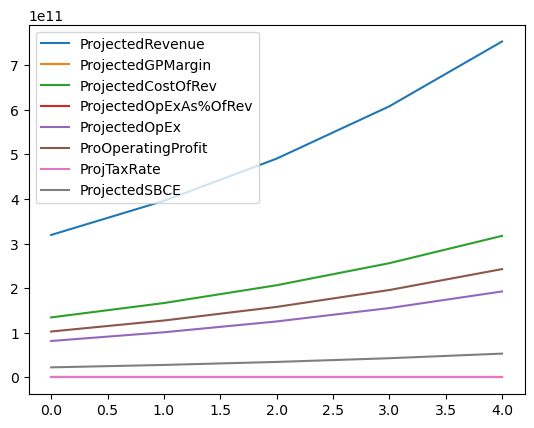

In [838]:
for item in pro_metrics:
    plt.plot(pro_metrics.index, pro_metrics[item], label=item)

plt.legend()
plt.show()

# Balance Sheet

In [834]:
metrics_bsheet = ['CashAndCashEquivalentsAtCarryingValue', 'AccountsReceivableNetCurrent', 
                  'InventoryNet', 'AssetsCurrent', 'PropertyPlantAndEquipmentNet', 
                  'IntangibleAssetsNetExcludingGoodwill', 'Assets'] 

dff = pd.DataFrame()

for m in metrics_bsheet:
    unit = list(cf[m]['units'].keys())[0]
    a = cf[m]['units'][unit]
    df = pd.DataFrame(a)
    
    dfnew = df.rename(columns={'val': m})
    dfnew = dfnew.loc[:, ['end', 'form', m]]
    dfnew = dfnew[dfnew['form'] == '10-K']
    
    if not dff.empty:
        dff = dff.merge(dfnew, left_on=['end', 'form'], right_on=['end', 'form'], how='inner')
    elif dff.empty:
        dff = dfnew
        

bsheet_df = dff.drop_duplicates(ignore_index=True)
bsheet_df = bsheet_df.drop_duplicates(subset='end', ignore_index=True)
bsheet_df['NonCurrentAssets'] = bsheet_df['Assets'] - bsheet_df['AssetsCurrent']
bsheet_df = bsheet_df.drop(labels=7, axis=0)
bsheet_df




,end,form,CashAndCashEquivalentsAtCarryingValue,AccountsReceivableNetCurrent,InventoryNet,AssetsCurrent,PropertyPlantAndEquipmentNet,IntangibleAssetsNetExcludingGoodwill,Assets,NonCurrentAssets
0,2015-12-31,10-K,16549000000,11556000000,491000000,90114000000,29016000000,3847000000,147461000000,57347000000
1,2016-12-31,10-K,12918000000,14137000000,268000000,105408000000,34234000000,3307000000,167497000000,62089000000
2,2017-12-31,10-K,10715000000,18336000000,749000000,124308000000,42383000000,2692000000,197295000000,72987000000
3,2018-12-31,10-K,16701000000,20838000000,1107000000,135676000000,59719000000,2220000000,232792000000,97116000000
4,2019-12-31,10-K,18498000000,25326000000,999000000,152578000000,73646000000,1979000000,275909000000,123331000000
5,2020-12-31,10-K,26465000000,30930000000,728000000,174296000000,84749000000,1445000000,319616000000,145320000000
6,2021-12-31,10-K,20945000000,39304000000,1170000000,188143000000,97599000000,1417000000,359268000000,171125000000


# Balance Sheet Projections

In [839]:
def grow(growthrate, growing):
    prev_proj = pd.Series(dtype='float64')
    for i in range(5):
        if prev_proj.empty:
            prev_proj = prev_proj.append(pd.Series(
                        (growthrate[i]+1)*growing.iloc[-1]))
        else:
            prev_proj = prev_proj.append(pd.Series(
                           (growthrate[i]+1)*prev_proj.iloc[-1]))
        
    return prev_proj.reset_index(drop=True)
            

#Accounts Recievable
bs_proj = pd.DataFrame() #Establish Projected Metrics DataFrame
bs_proj['AccountsReceivableProj'] = grow(metrics_df['AssumedGrowthRate'], 
                                                     bsheet_df['AccountsReceivableNetCurrent'])
#Percent Change in Cost of Revenue
b = (metrics_df['CostOfRevenue'].append(pro_metrics['ProjectedCostOfRev']).reset_index(drop=True)[6:12]
     .pct_change().dropna())
bs_proj['PercentChangeCOR'] = pd.Series(b).reset_index(drop=True)


#Inventory Projected
bs_proj['InventoryProj'] = grow(bs_proj['PercentChangeCOR'], bsheet_df['InventoryNet'])


#Other Current Assets Projected
bsheet_df['CurrentAssetsOther'] = bsheet_df['AssetsCurrent'] - (bsheet_df['CashAndCashEquivalentsAtCarryingValue']
                                                               + bsheet_df['InventoryNet'])
bs_proj['OtherCurrentAssetsProj'] = grow(metrics_df['AssumedGrowthRate'], bsheet_df['CurrentAssetsOther'])


#Current Assets Proj
bs_proj['CurrentAssetsProj'] = (bs_proj['OtherCurrentAssetsProj'] + bs_proj['InventoryProj']
                                + bs_proj['AccountsReceivableProj'])
bs_proj

,AccountsReceivableProj,PercentChangeCOR,InventoryProj,OtherCurrentAssetsProj,CurrentAssetsProj
0,4.870181e+10,0.212818,1.418997e+09,2.057262e+11,2.558471e+11
1,6.034669e+10,0.239106,1.758288e+09,2.549166e+11,3.170215e+11
2,7.477593e+10,0.239106,2.178704e+09,3.158686e+11,3.928232e+11
3,9.265528e+10,0.239106,2.699645e+09,3.913945e+11,4.867495e+11
4,1.148097e+11,0.239106,3.345146e+09,4.849792e+11,6.031341e+11


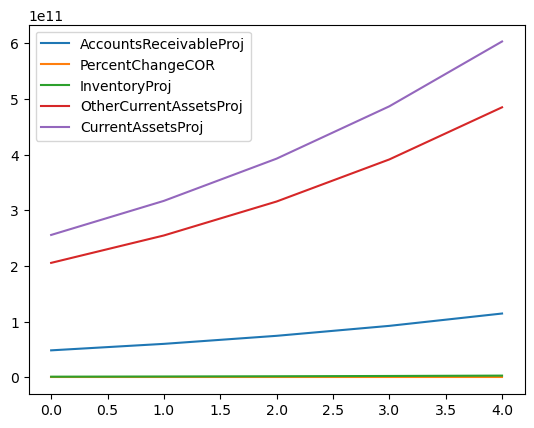

In [836]:
for item in bs_proj:
    plt.plot(bs_proj.index, bs_proj[item], label=item)

plt.legend()
plt.show()